In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
                

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("sample-data.csv")
df.shape

(10455, 10)

In [4]:
labels={"36":1,"37":2,"38":3,"39":4}

## Adding labels

In [5]:
df["local_time"]=[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)) for x in df["time"].values ]
df["label"]=df["local_time"].str[14:-3]
df["label"]=[labels[i] for i in df["label"].values]
df.head()

,time,accX,accY,accZ,gyrX,gyrY,gyrZ,magX,magY,magZ,local_time,label
0,1620022010,-5.509766,-2.220703,5.208984,3.417969,16.113281,-30.944824,-0.175195,0.006348,0.060303,2021-05-03 11:36:50,1
1,1620022010,-5.533203,-2.210938,5.205078,-15.380859,22.277832,-27.893066,-0.175195,0.006348,0.060303,2021-05-03 11:36:50,1
2,1620022010,-5.591797,-2.097656,5.251953,-28.564453,27.282715,-22.155762,-0.175195,0.006348,0.060303,2021-05-03 11:36:50,1
3,1620022011,-5.517578,-2.107422,5.220703,-43.029785,37.841797,-6.103516,-0.175195,0.006348,0.060303,2021-05-03 11:36:51,1
4,1620022011,-5.562500,-2.152344,5.306641,-57.617188,41.503906,12.451172,-0.175195,0.006348,0.060303,2021-05-03 11:36:51,1


### splitting dataset into 80:20

In [6]:
x=df.iloc[:,1:-2]
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape #dividing dataset into 80:20

((8364, 9), (2091, 9))

### Normalising the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [8]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
#use same sclar for train and test dataset toavoid leakage
x_train_scaled.shape,x_test_scaled.shape

((8364, 9), (2091, 9))

### plot data

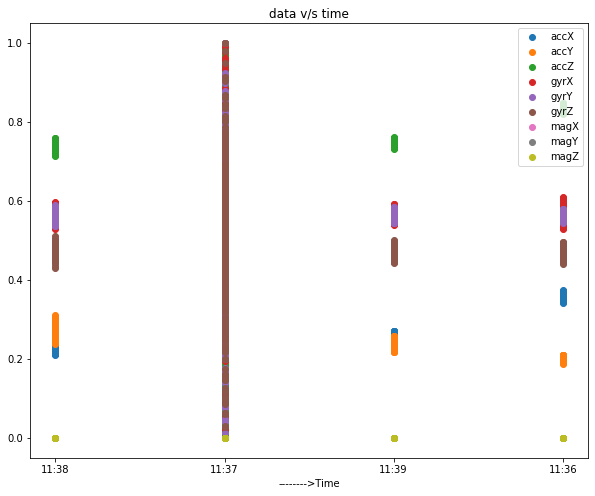

In [9]:
time=np.array([ df["local_time"][i][11:-3] for i in x_train.index])
plt.figure(figsize=(10,8))
for i in range(9):
     plt.scatter(time,x_train_scaled[:,i],label=df.columns[1+i])
plt.xlabel("-------->Time")
plt.legend(loc="upper right")
plt.title("data v/s time")
plt.show()

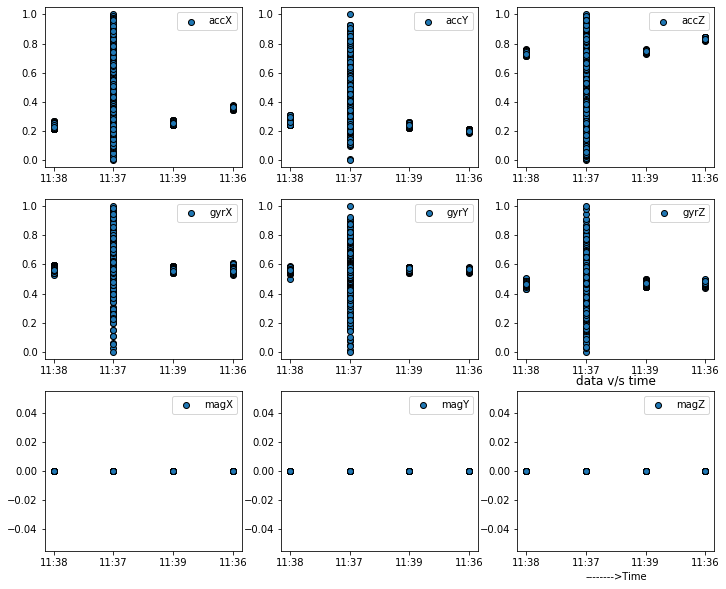

In [10]:
# we can also plot separate plots for each feature:
plt.figure(figsize=(12,10))
for i in range(9):
     plt.subplot(3,3,i+1)
     plt.scatter(time,x_train_scaled[:,i],label=df.columns[1+i],edgecolors="black")
     plt.legend(loc="upper right")
plt.xlabel("-------->Time")
plt.legend(loc="upper right")
plt.title("data v/s time")
plt.show()


### DNN sequential model:

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras as ke
from sklearn.model_selection import StratifiedKFold

In [12]:
model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(9,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))

#the output layer size is same as the number of classes so as here we have 4 classes numbered from 1 to 4 
#hence for the output layer we take 4
model.add(layers.Dense(4,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 11,172
Trainable params: 11,172
Non-trainable params: 0
_________________________________________________________________


In [14]:
#conversion of label data into categorial label data of dimension (8364, 4)and (2091, 4) 
#since our output layer of model has 4 nodes then we need to index the layers starting from index 0 i.e. 
#we will map class label 1 to 0,class label 2 to 1,class label 3 to 2 ,class label 4 to 3 
#for categorical dataset is indexed from 0
y_train=ke.utils.to_categorical(y_train-1)
y_test=ke.utils.to_categorical(y_test-1)
y_train.shape,y_test.shape

((8364, 4), (2091, 4))

In [15]:
#compile the model
model.compile(loss='CategoricalCrossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [16]:
#fit the model
cvscore=[]
history=model.fit(x_train_scaled, y_train, batch_size=32, epochs=10,validation_split=0.1)


Epoch 1/10
236/236 [==============================] - 3s 4ms/step - loss: 0.9756 - accuracy: 0.5547 - val_loss: 0.7287 - val_accuracy: 0.6141
Epoch 2/10
236/236 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7065 - val_loss: 0.6136 - val_accuracy: 0.6296
Epoch 3/10
236/236 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7566 - val_loss: 0.4545 - val_accuracy: 0.7706
Epoch 4/10
236/236 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7861 - val_loss: 0.3171 - val_accuracy: 0.9008
Epoch 5/10
236/236 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8051 - val_loss: 0.4247 - val_accuracy: 0.7097
Epoch 6/10
236/236 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8172 - val_loss: 0.4616 - val_accuracy: 0.7157
Epoch 7/10
236/236 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8232 - val_loss: 0.4148 - val_accuracy: 0.7694
Epoch 

### Plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


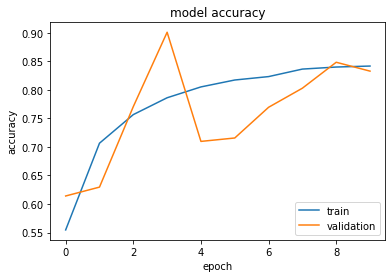

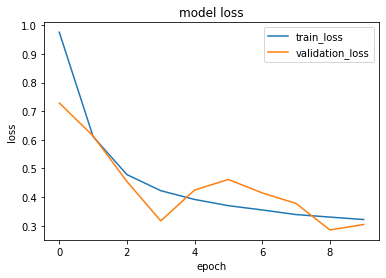

In [17]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
plt.show()

In [18]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
#Also using Stratified K cross validation
cvscores = []
print("test accuracies when stratified K-cross validation is used")
for train, test in kfold.split(x,y):
    ## create model
    #print(y[test].values.shape)
    
    model = models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(9,)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(32,activation="relu"))
    #the output layer size is same as the number of layers indexing from 0hence we take 5 instead of 4
    model.add(layers.Dense(4,activation="softmax"))
    # Compile model
    model.compile(loss='CategoricalCrossentropy',optimizer="rmsprop",metrics=['accuracy'])
    # Fit the model
    y_train=ke.utils.to_categorical(y[train]-1)
    y_test=ke.utils.to_categorical(y[test]-1)
    x_train_scaled=scaler.fit_transform(x.iloc[train])
    x_test_scaled=scaler.fit_transform(x.iloc[test])
    model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
    # evaluate the model
    scores = model.evaluate(x_test_scaled, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

test accuracies when stratified K-cross validation is used
accuracy: 62.14%
accuracy: 34.99%
accuracy: 57.84%
accuracy: 22.85%
accuracy: 33.56%
accuracy: 25.45%
accuracy: 33.59%
accuracy: 69.09%
accuracy: 53.30%
accuracy: 83.73%
47.65% (+/- 19.42%)


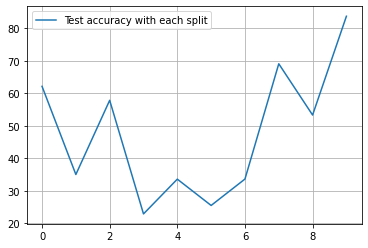

In [19]:
plt.plot(cvscores,label="Test accuracy with each split")
plt.legend()
plt.grid()